### Universidad Nacional de Lujan - Bases de Datos Masivas (11088) - Cavasin Nicolas #143501
# TP05-02 - Clustering

### Ejercicio 4:
**K-means**. Se provee un dataset sobre las características internas del núcleo de tres clases de trigo diferentes. Cargue el dataset en una de las herramientas de minería de datos provistas y resuelva:

a. Utilice el algoritmo k-medias variando la cantidad de centroides a efectos de agrupar los datos de la manera más eficiente.

b. ¿Cuál es la cantidad de grupos que permite un mejor agrupamiento de los datos? ¿Mediante cual métrica puede verificar esto?

c. ¿Cuáles son las características más distintivas de cada uno de los cluters resultantes?

In [1]:
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/trigo.csv

import pandas as pd

trigo = pd.read_csv('trigo.csv', delimiter=';')

print(f'Cantidad de tuplas: {trigo.shape[0]}.')
print(f'Cantidad de columnas: {trigo.shape[1]}.')
print(f'Cantidad de NaN\'s: {trigo.isnull().sum().sum()}.\n')
print(f'Tipos de dato en cada columna: \n{trigo.dtypes}')
trigo.head()

--2020-11-25 00:10:52--  https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/trigo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9369 (9.1K) [text/plain]
Saving to: ‘trigo.csv’

trigo.csv           100%[===================>]   9.15K  --.-KB/s    in 0s      

2020-11-25 00:10:53 (92.9 MB/s) - ‘trigo.csv’ saved [9369/9369]

Cantidad de tuplas: 210.
Cantidad de columnas: 8.
Cantidad de NaN's: 0.

Tipos de dato en cada columna: 
area               object
perimetro          object
compact            object
long_kernel        object
ancho_kernel       object
coef_asimetrima    object
long_ranura        object
tipo                int64
dtype: object


,area,perimetro,compact,long_kernel,ancho_kernel,coef_asimetrima,long_ranura,tipo
0,"15,26","14,84","0,871","5,763","3,312","2,221","5,22",1
1,"14,88","14,57","0,8811","5,554","3,333","1,018","4,956",1
2,"14,29","14,09","0,905","5,291","3,337","2,699","4,825",1
3,"13,84","13,94","0,8955","5,324","3,379","2,259","4,805",1
4,"16,14","14,99","0,9034","5,658","3,562","1,355","5,175",1


Se puede observar lo siguiente:

1. El dataset no posee ``NaN``'s.

2. Los valores que son strings (*objects*) deben ser convertidos a numericos:
  - Primero reemplazando las ``,`` (comas) por ``.``(puntos).
  - Luego sí, convirtiendo a *float64* utilizando la librería numpy.

3. Posteriormente deben ser escalados para poder aplicar K-Means, ya que se basa en distancias y cada columna tiene diferentes unidades acordes al tipo de dato que representan.

In [2]:
import numpy as np

# Clono el dataset
trigo_numerizado = trigo.copy()

# Convierto todos los strings a numericos reemplazando la ',' por un '.'
# y luego los paso a float64 con numpy
for col in trigo.columns:
    if col != 'tipo':
        trigo_numerizado[col] = pd.to_numeric(trigo[col].str.replace(',','.'))

# Me guardo los nombres de las columnas
column_names = trigo_numerizado.columns

# Muestro como quedo
trigo_numerizado.head()

,area,perimetro,compact,long_kernel,ancho_kernel,coef_asimetrima,long_ranura,tipo
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# Ahora procedo con el escalado de valores
from sklearn.preprocessing import scale

# Escalo
trigo_scaled = scale(trigo_numerizado)

# Muestro resultado
print(f'Valores escalados:\n{trigo_scaled}')

Valores escalados:
[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ... -9.86151745e-01
  -3.83577423e-01 -1.22474487e+00]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ... -1.78816620e+00
  -9.22013487e-01 -1.22474487e+00]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ... -6.67479334e-01
  -1.18919199e+00 -1.22474487e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ...  3.07658816e+00
  -7.18060432e-01  1.22474487e+00]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -6.81351965e-02
  -7.42534799e-01  1.22474487e+00]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ...  1.29122264e+00
  -7.03783718e-01  1.22474487e+00]]


In [4]:
# Importo para clusterizar
from sklearn.cluster import KMeans

# Importo para graficar
import matplotlib.pyplot as plt

# Instancio el algoritmo con 3 centroides iniciales
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, random_state=0
)

# Ejecuto el algoritmo
trigo_pred = km.fit_predict(trigo_scaled)

print(f'Agrupamiento resultante:\n{trigo_pred}')

Agrupamiento resultante:
[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


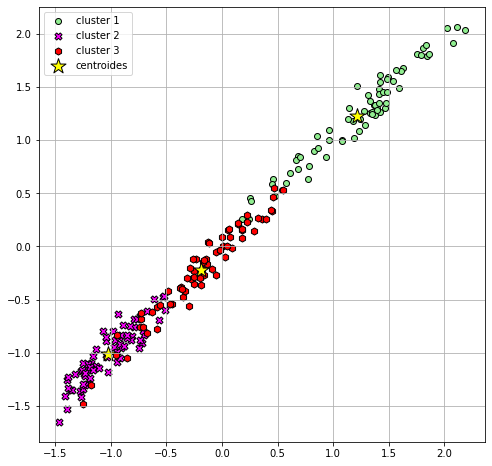

In [9]:
# Importo para graficar
import matplotlib.pyplot as plt

# Creo el grafico
plt.figure(figsize=(8,8))

# Scatter del primer cluster
plt.scatter(
    trigo_scaled[trigo_pred == 0, 0], 
    trigo_scaled[trigo_pred == 0, 1],
    c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

# Scatter del segundo cluster
plt.scatter(
    trigo_scaled[trigo_pred == 1, 0], 
    trigo_scaled[trigo_pred == 1, 1],
    s=50, c='magenta',
    marker='X', edgecolor='black',
    label='cluster 2'
)

# Scatter del tercer cluster
plt.scatter(
    trigo_scaled[trigo_pred == 2, 0], 
    trigo_scaled[trigo_pred == 2, 1],
    s=50, c='red',
    marker='h', edgecolor='black',
    label='cluster 3'
)

# Scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroides'
)

# Inserto leyenda
plt.legend(scatterpoints=1)

# Agrego el grid 
plt.grid()
plt.savefig('trigo.png', bbox_inches='tight', transparent=True)
# Lo muestro
plt.show()


Se aplicó **K-Means** utilizando 3 clusters y como resultado se observa una agrupación de datos bastante correcta. 

En el caso de que haya superposiciones de puntos pertenecientes a diferentes clusters, es importante recordar que se puede deber a:
- Mala selección de clusters.
- Se están graficando solo dos variables de un dataset multidimensional, por lo tanto puede que una variable clave (que determina a cuál cluster pertenece un punto) no haya sido graficada.

De todas maneras, para determinar la cantidad de clusters que mejor agrupa los datos, se pueden aplicar dos técnicas:
- *Método de Elbow*.
- *Coeficiente silueta*.

A continuación se aplicará el *método Elbow*:

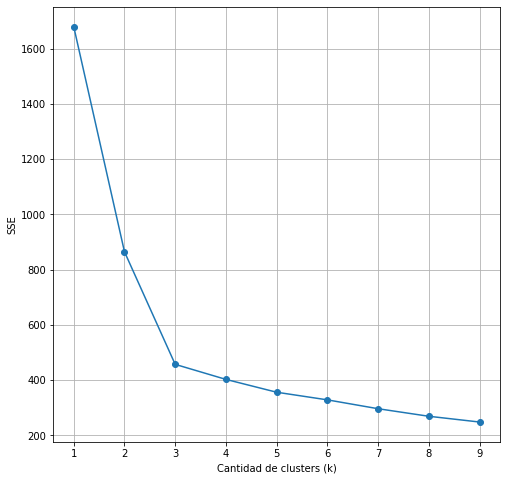

In [10]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.

# Creo la lista de errores
# sse = Sum of Squared Error
sse = []

# Creo la lista de modelos con 10 clusters (0 a 9 clusters)
lista_modelos = list(range(1, 10))

# Por cada version de clusters de K-means
for num_clusters in lista_modelos:
    # Instancio la version con num_clusters cantidad de clusters
    num_clusters = KMeans(n_clusters=num_clusters)
    # La entreno
    num_clusters.fit(trigo_scaled)
    # Obtengo su error
    sse.append(num_clusters.inertia_)

# Grafico el SSE por cada modelo
plt.figure(figsize=(8, 8))

plt.plot(lista_modelos, sse, '-o')
plt.grid()
plt.xlabel(r'Cantidad de clusters (k)')
plt.ylabel('SSE');

plt.savefig('elbow.png', bbox_inches='tight', transparent=True)
plt.show()


El *método Elbow* nos confirma que la cantidad ideal de clusters es 3 y que la superposición de puntos de diferentes clusters se debe a *la maldición de la dimensionalidad* explicada anteriormente.

In [ ]:
# Calculo la moda sobre la columna 'tipo' de los puntos que pertenecen al cluster 3
moda_c1 = pd.DataFrame.mode(trigo[trigo_pred==0], dropna=True)
print(f"Moda cluster 1: {moda_c1.loc[0, 'tipo']}")

# Calculo la moda sobre la columna 'tipo' de los puntos que pertenecen al cluster 3
moda_c2 = pd.DataFrame.mode(trigo[trigo_pred==1], dropna=True)
print(f"Moda cluster 2: {moda_c2.loc[0, 'tipo']}")

# Calculo la moda sobre la columna 'tipo' de los puntos que pertenecen al cluster 3
moda_c3 = pd.DataFrame.mode(trigo[trigo_pred==2], dropna=True)
print(f"Moda cluster 3: {moda_c3.loc[0, 'tipo']}")


Moda cluster 1: 2.0
Moda cluster 2: 3.0
Moda cluster 3: 1.0


***Observaciones:***

En el gráfico se graficaron las variables '*área*' y '*perímetro*' del dataset y con cada color y forma se indicó a cuál cluster pertenecía cada tupla del dataframe. 

Sin embargo, y como se explicó anteriormente, debido a la *maldición de la dimensionalidad* en el scatterplot se ven puntos de diferentes clusters que se superponen o están muy cerca entre sí.

Para finalizar, se calculó la moda de cada cluster y se identificó el tipo de trigo que es más común encontrar en cada uno de ellos.

## Conclusiones:
1. A simple vista, y sin importar a qué cluster pertenece cada punto, se puede decir que hay una relación de *dependencia lineal* entre las variables graficadas (y que está matemáticamente respaldada también).

2. El cluster #3 representa a los tipos de trigo con mayor área y perímetro de todo el dataset, los cuales pertenecen al trigo de **tipo 1**.

3. El cluster #2 posee en su mayoría trigo **tipo 3**. Este tipo de trigo posee un *área* y un *perímetro* con valores promedio respecto a los otros dos presentes en el dataset, pues se ubica en el centro del gráfico.

4. El cluster #1 posee una moda de trigo de **tipo 2**, cuyos valores de *área* y *perímetro* son los de menor tamaño de todo el dataset.

___


### Ejercicio 5:
Ahora, trabaje sobre el dataset *abandono_cuantitativo.csv*:

- Escoja los features que a su entender permitan un mejor agrupamiento, pre-procese los mismos y entrene un modelo a partir de **K-Means**.

- Analice y describa las características más salientes de cada uno de los grupos encontrados por el algoritmo.

- Encuentre la cantidad de grupos que logran el mejor agrupamiento para los datos. Justifique la elección a partir de métricas y gráficas de los conglomerados resultantes.

- Ahora aplique algún algoritmo jerárquico a efectos de agrupar los datos. ¿Cuál nivel se corresponde con el agrupamiento realizado por k-medias en el punto **6) a)**?

- ¿El agrupamiento jerárquico permite encontrar una mejor forma de agrupar los datos? Si fuera así, ¿Cuál es ese agrupamiento?


In [13]:
# Obtengo el dataset
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/ds-abandono.xls

# Importo pandas para lectura
import pandas as pd

# Leo el dataset
abandono = pd.read_excel('ds-abandono.xls')

# Muestro caracteristicas
print(f'Cantidad de tuplas: {abandono.shape[0]}')
print(f'Cantidad de columnas: {abandono.shape[1]}')
print(f'Cantidad de NaN\'s: {abandono.isnull().sum().sum()}\n')
print(f'NaN\'s por columna:\n{abandono.isnull().sum()}')

# Creo un dict para almacenar los tipos de datos de cada columna
tipos = {}
# Cuento
print(f'\nFormato de cada columna:')
for col in abandono.columns:
    tipos[abandono[col].dtype] = 1 

print(f'Tipos en el dataset: {tipos.keys()}\n')
abandono.head()

--2020-11-25 00:34:10--  https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/ds-abandono.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4633088 (4.4M) [application/octet-stream]
Saving to: ‘ds-abandono.xls’

ds-abandono.xls     100%[===================>]   4.42M  --.-KB/s    in 0.08s   

2020-11-25 00:34:10 (56.5 MB/s) - ‘ds-abandono.xls’ saved [4633088/4633088]

Cantidad de tuplas: 16334
Cantidad de columnas: 31
Cantidad de NaN's: 8

NaN's por columna:
legajo                    0
estado_civil              0
carrera                   0
carrera_grado             0
sede                      0
anio_ingreso              0
horas_trabajadas          0
masculino                 0
femenino                  0
edad_ingreso              0
colegio_pub

,legajo,estado_civil,carrera,carrera_grado,sede,anio_ingreso,horas_trabajadas,masculino,femenino,edad_ingreso,colegio_publico,argentino,activo_primer_anio,activo_segundo_anio,estado,promedio_1er_anio,anios_en_unlu,aprobadas_1er_anio,anios_cursados,c_promociones_1er_anio,c_libres_1er_anio,c_regulares_1er_anio,c_ausentes_1er_anio,c_noausentes_1er_anio,cursadas_ap_1er_anio,cursadas_1er_anio,cambio_universidad,cambio_carrera,progresar_2016,fracaso_academico,activo_2017
0,1,SOLTERO/A,LICENCIATURA EN ENFERMERIA,1,SEDE LUJAN,2016,0,0,1,22,1,1,1,0,INHABILITADO,2.33,1.0,0,1,0,3,4,8,8,4,16,0,1,0,0,0
1,2,UNIDO/A,LICENCIATURA EN TRABAJO SOCIAL,1,SEDE LUJAN,2014,0,0,1,21,1,1,0,1,LIBRE,-,2.0,0,2,0,0,1,3,1,1,4,0,0,1,0,0
2,3,CASADO/A,LICENCIATURA EN CS. DE LA EDUCACION,1,SEDE LUJAN,2014,0,0,1,54,1,1,1,0,LIBRE,-,3.0,0,3,0,0,0,2,0,0,2,0,1,0,0,0
3,4,SOLTERO/A,CONTADOR PUBLICO,1,D.A. MERCEDES,2014,0,0,1,28,1,1,1,0,LIBRE,-,3.0,0,3,0,0,0,2,0,0,2,0,0,0,0,0
4,5,SOLTERO/A,CONTADOR PUBLICO,1,SEDE LUJAN,2016,24,0,1,28,1,1,1,1,REGULAR,2,2.0,0,2,0,0,1,0,1,1,1,0,0,0,0,1


***Observaciones:***
- La columna *anios_en_unlu* posee 8 valores faltantes.

- Para poder definir cuales son las features que permiten  el mejor agrupamiento se realizarán las siguientes acciones:
    - Imputar por hot-deck los 8 valores faltantes de *anios_en_unlu*.
    - Convertir la columna *promedios_1er_anio* a numerico.
    - Pre-procesar las columnas *String* para discretizarlas.
    - Escalar los valores.
    - Realizar un análisis por componentes principales (PCA).

In [14]:
## Imputo por la media la columna anios_en_unlu
abandono.fillna(abandono['anios_en_unlu'].mean(), inplace=True)

# Verifico que se haya imputado correctamente
print(f'Cantidad de NaN\'s: {abandono.isnull().sum().sum()}\n')

# Convierto a numerico la columa promedio_1er_anio
abandono['promedio_1er_anio'].replace('-','0', inplace=True)

# Clono el ds
abandono_numerico = abandono.copy()

# Convierto a numerico
abandono_numerico['promedio_1er_anio'] = pd.to_numeric(abandono['promedio_1er_anio'])

# Muestro como quedo
abandono_numerico.head()

Cantidad de NaN's: 0



,legajo,estado_civil,carrera,carrera_grado,sede,anio_ingreso,horas_trabajadas,masculino,femenino,edad_ingreso,colegio_publico,argentino,activo_primer_anio,activo_segundo_anio,estado,promedio_1er_anio,anios_en_unlu,aprobadas_1er_anio,anios_cursados,c_promociones_1er_anio,c_libres_1er_anio,c_regulares_1er_anio,c_ausentes_1er_anio,c_noausentes_1er_anio,cursadas_ap_1er_anio,cursadas_1er_anio,cambio_universidad,cambio_carrera,progresar_2016,fracaso_academico,activo_2017
0,1,SOLTERO/A,LICENCIATURA EN ENFERMERIA,1,SEDE LUJAN,2016,0,0,1,22,1,1,1,0,INHABILITADO,2.33,1.0,0,1,0,3,4,8,8,4,16,0,1,0,0,0
1,2,UNIDO/A,LICENCIATURA EN TRABAJO SOCIAL,1,SEDE LUJAN,2014,0,0,1,21,1,1,0,1,LIBRE,0.00,2.0,0,2,0,0,1,3,1,1,4,0,0,1,0,0
2,3,CASADO/A,LICENCIATURA EN CS. DE LA EDUCACION,1,SEDE LUJAN,2014,0,0,1,54,1,1,1,0,LIBRE,0.00,3.0,0,3,0,0,0,2,0,0,2,0,1,0,0,0
3,4,SOLTERO/A,CONTADOR PUBLICO,1,D.A. MERCEDES,2014,0,0,1,28,1,1,1,0,LIBRE,0.00,3.0,0,3,0,0,0,2,0,0,2,0,0,0,0,0
4,5,SOLTERO/A,CONTADOR PUBLICO,1,SEDE LUJAN,2016,24,0,1,28,1,1,1,1,REGULAR,2.00,2.0,0,2,0,0,1,0,1,1,1,0,0,0,0,1


In [15]:
# Importo para discretizar
from sklearn.preprocessing import LabelEncoder, scale

## Discretizo las variables de tipo String

# Creo la lista
str_cols = []

# Me guardo los nombres de las columnas de tipo string
for col in abandono.columns:
    if abandono[col].dtype == 'object':
        str_cols.append(col)

#print(f'Columnas a discretizar: {str_cols}')

# Clono el ds
abandono_disc = abandono.copy()

# Instancio el encoder
le = LabelEncoder()
for col in str_cols:
    abandono_disc[col] = le.fit_transform(abandono_numerico[col])

# Ahora escalo
abandono_scaled = scale(abandono_disc)

print(f'Dataset discretizado y escalado:\n{abandono_scaled}')

Dataset discretizado y escalado:
[[-1.73194477  0.25573603  0.29047925 ... -0.44075815 -0.3402743
  -0.81196357]
 [-1.73173269  1.51696561  0.63383072 ...  2.26881793 -0.3402743
  -0.81196357]
 [-1.73152061 -3.52795271  0.20464138 ... -0.44075815 -0.3402743
  -0.81196357]
 ...
 [ 1.73152061  0.25573603 -1.59795382 ... -0.44075815 -0.3402743
   1.23158234]
 [ 1.73173269  0.25573603 -1.59795382 ... -0.44075815 -0.3402743
  -0.81196357]
 [ 1.73194477  0.25573603 -1.59795382 ... -0.44075815 -0.3402743
   1.23158234]]


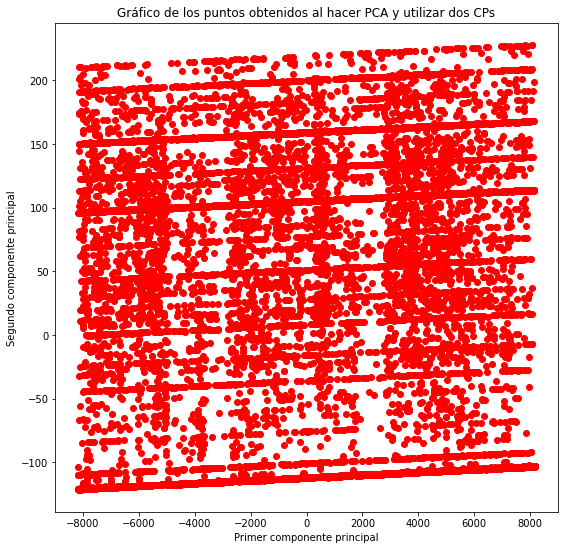

In [16]:
# Importo para hacer PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instancio indicando que deseo quedarme con las primeras dos componentes
pca = PCA(n_components=2)

# Entreno y transformo
abandono_pca = pca.fit_transform(abandono_disc)

# Grafico los puntos obtenidos
plt.figure(figsize=(9, 9))
plt.grid
plt.scatter(abandono_pca[:,0],
            abandono_pca[:,1],      
            c='red')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Gráfico de los puntos obtenidos al hacer PCA y utilizar dos CPs')
plt.savefig('pca_1.png', bbox_inches='tight', transparent=True)
plt.show()

Agrupamiento resultante:
[3 3 3 ... 0 0 0]


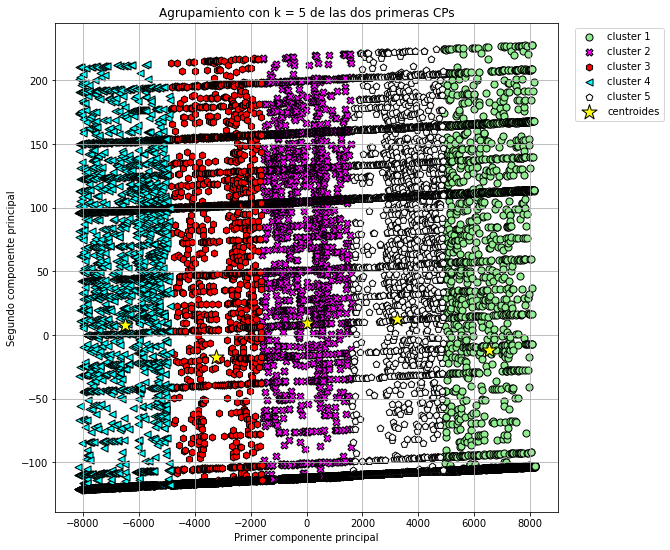

In [18]:
# Importo kmeans
from sklearn.cluster import KMeans

# Por defecto usa la distancia euclidea
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, random_state=0
)

# Ejecuto kmeans
abandono_pred = km.fit_predict(abandono_pca)

# Muestro la clusterización
print(f'Agrupamiento resultante:\n{abandono_pred[:]}')

# Creo el grafico
plt.figure(figsize=(9, 9))

# Scatter del primer cluster
plt.scatter(
    abandono_pca[abandono_pred == 0, 0], 
    abandono_pca[abandono_pred == 0, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

# Scatter del segundo cluster
plt.scatter(
    abandono_pca[abandono_pred == 1, 0], 
    abandono_pca[abandono_pred == 1, 1],
    s=50, c='magenta',
    marker='X', edgecolor='black',
    label='cluster 2'
)

# Scatter del tercer cluster
plt.scatter(
    abandono_pca[abandono_pred == 2, 0], 
    abandono_pca[abandono_pred == 2, 1],
    s=50, c='red',
    marker='h', edgecolor='black',
    label='cluster 3'
)

# Scatter del cuarto cluster
plt.scatter(
    abandono_pca[abandono_pred == 3, 0], 
    abandono_pca[abandono_pred == 3, 1],
    s=50, c='cyan',
    marker='<', edgecolor='black',
    label='cluster 4'
)


# Scatter del quinto cluster
plt.scatter(
    abandono_pca[abandono_pred == 4, 0], 
    abandono_pca[abandono_pred == 4, 1],
    s=50, c='white',
    marker='p', edgecolor='black',
    label='cluster 5'
)

# Scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroides'
)


# Inserto leyenda
plt.legend(scatterpoints=1, bbox_to_anchor=(1.025, 1), loc='upper left')
plt.grid()
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Agrupamiento con k = 5 de las dos primeras CPs')
plt.savefig('pca_1_clusterizado.png', bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
# Muestro la cantidad de varianza aportada por cada componente
print(f'Cantidad de varianza capturada por CP1: {pca.explained_variance_ratio_[0]}')
print(f'Cantidad de varianza capturada por CP2: {pca.explained_variance_ratio_[1]}\n')

# Muestro que tan importante resultó cada feature para ambas componentes
pd.DataFrame(pca.components_, columns=abandono.columns, index = ['CP1','CP2'])

Cantidad de varianza capturada por CP1: 0.9994023177984407
Cantidad de varianza capturada por CP2: 0.000571472295130435



,legajo,estado_civil,carrera,carrera_grado,sede,anio_ingreso,horas_trabajadas,masculino,femenino,edad_ingreso,colegio_publico,argentino,activo_primer_anio,activo_segundo_anio,estado,promedio_1er_anio,anios_en_unlu,aprobadas_1er_anio,anios_cursados,c_promociones_1er_anio,c_libres_1er_anio,c_regulares_1er_anio,c_ausentes_1er_anio,c_noausentes_1er_anio,cursadas_ap_1er_anio,cursadas_1er_anio,cambio_universidad,cambio_carrera,progresar_2016,fracaso_academico,activo_2017
CP1,0.999999,0.000003,-0.000043,4.448159e-07,-0.000068,0.000162,0.000021,-5.510732e-07,5.510732e-07,0.000016,-8.252918e-07,-5.956328e-07,-6.212409e-07,-0.000007,-0.000001,-0.001086,-0.000075,-0.000030,-0.000046,-0.000021,0.000002,-0.000023,0.000004,-0.000046,-0.000044,-0.000042,-0.000002,-0.000011,0.000003,0.000001,0.000009
CP2,0.001089,0.000235,0.006009,1.016979e-04,-0.000796,0.000275,-0.009164,-7.040062e-05,7.040062e-05,-0.008293,-7.718296e-04,5.009225e-05,3.048763e-04,0.001731,0.002203,0.999435,0.003193,0.013423,0.002860,0.011103,0.000705,0.003236,-0.002277,0.014962,0.014339,0.012686,0.000072,0.000290,0.000311,-0.000397,0.001555


***Observaciones:*** 

Aparentemente el PCA arrojó buenos resultados, con tan solo dos componentes principales se obtuvo casi el 100% de la varianza y esto despierta ciertas dudas:

- Lo primero que se me ocurre al realizar *K-Means* sobre un dataset con tipos de datos mixtos (Strings, numericos y Bools) es qué medida de distancia se puede aplicar de igual manera para todos (¿minkowski?) y que a la vez pueda ser compatible con *K-Means* (que usa distancia euclideana).

- Este ejercicio me deja bastante confundido, principalmente porque es bastante dificil medir la distancia entre valores numéricos y valores no numéricos como un *String*. **¿Qué tan representativo sería eso? ¿Tiene sentido?** 

- Se puede utilizar el coeficiente de Jaccard pero solo tendría validez si *todo* el dataset estuviera compuesto por valores de tipo *String*, cosa que aquí no sucede, y luego así hacer algo similar a lo que requería el ejercicio 2.

___


Por todo lo anterior, procedo a elegir TODAS las features numéricas para luego realizar PCA sobre ellas, algo que a mí criterio tiene un poco más de sentido:

In [20]:
# Defino las features
features = ['anio_ingreso', 'horas_trabajadas', 'edad_ingreso', 'anios_en_unlu', 'anios_cursados',
            'c_promociones_1er_anio', 'c_libres_1er_anio', 'c_regulares_1er_anio', 'c_ausentes_1er_anio',
            'c_noausentes_1er_anio', 'cursadas_1er_anio', 'cursadas_ap_1er_anio']

print('Features seleccionadas:')
print(features)

# Obtengo el subset
abandono2 = abandono_disc[features]

# Lo escalo
abandono2_scaled = scale(abandono2)

# Lo muestro
print(f'\nPrimeras 10 tuplas de las features escaladas:\n{abandono2_scaled[1:10]}')

Features seleccionadas:
['anio_ingreso', 'horas_trabajadas', 'edad_ingreso', 'anios_en_unlu', 'anios_cursados', 'c_promociones_1er_anio', 'c_libres_1er_anio', 'c_regulares_1er_anio', 'c_ausentes_1er_anio', 'c_noausentes_1er_anio', 'cursadas_1er_anio', 'cursadas_ap_1er_anio']

Primeras 10 tuplas de las features escaladas:
[[-1.25023409 -0.75244423 -0.31063595  0.12109221  0.27705756 -0.67087661
  -0.90083919 -0.16216549  0.68227621 -0.91289099 -0.58227877 -0.54624585]
 [-1.25023409 -0.75244423  3.88017378  1.06519505  1.42100555 -0.67087661
  -0.90083919 -0.77291282  0.11267235 -1.2067591  -1.19242385 -0.88979749]
 [-1.25023409 -0.75244423  0.57832369  1.06519505  1.42100555 -0.67087661
  -0.90083919 -0.77291282  0.11267235 -1.2067591  -1.19242385 -0.88979749]
 [ 1.20720558  0.55275087  0.57832369  0.12109221  0.27705756 -0.67087661
  -0.90083919 -0.16216549 -1.02653538 -0.91289099 -1.49749639 -0.54624585]
 [-1.25023409 -0.42614546  0.32433522  2.0092979   1.42100555  0.34216754
  -0.90

In [21]:
# Grafico biplot (ver referencias al final de la notebook)
def myplot(score,coeff,labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.5/(xs.max() - xs.min())
    scaley = 1.5/(ys.max() - ys.min())
    plt.figure(figsize=(9,9))
    plt.scatter(xs * scalex, ys * scaley, c='white', edgecolors='red', alpha=0.3)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'black', alpha = 0.75)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Feature"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("Componente principal {}".format(1))
    plt.ylabel("Componente principal {}".format(2))
    plt.title('Biplot de las primeras dos CPs')
    plt.grid

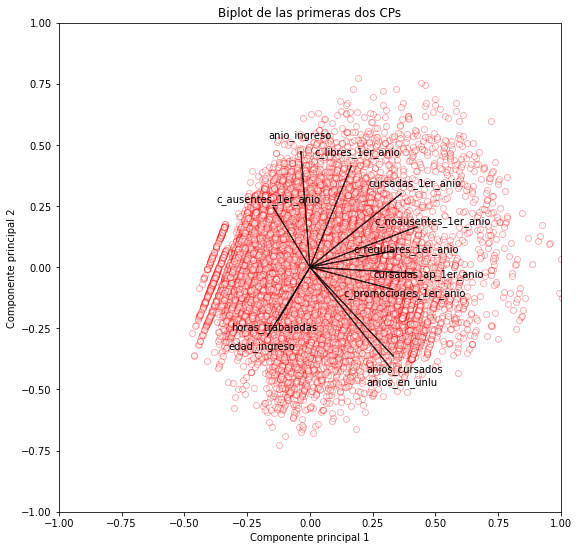

In [22]:
# Importo numpy
import numpy as np

# Instancio indicando que deseo capturar al menos 80% de la varianza 
pca2 = PCA(.80)

# Entreno y transformo
abandono_pca2 = pca2.fit_transform(abandono2_scaled)

# Muestro el biplot
myplot(abandono_pca2[:,0:2], np.transpose(pca2.components_[0:2, :]), features)
plt.savefig('pca_2_biplot.png', bbox_inches='tight', transparent=True)
plt.show()

Agrupamiento resultante:
[0 1 1 ... 1 1 1]


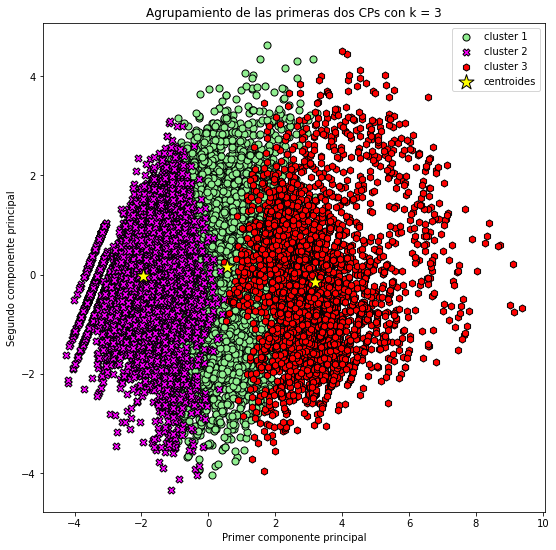

In [23]:
# Instancio KMeans con 3 clusters
km2 = KMeans(
    n_clusters=3, init='random',
    n_init=10, random_state=0
)

# Ejecuto kmeans
abandono_pred2 = km2.fit_predict(abandono_pca2)

# Muestro la clusterización
print(f'Agrupamiento resultante:\n{abandono_pred2[:]}')

# Creo el grafico
plt.figure(figsize=(9, 9))

# Scatter del primer cluster
plt.scatter(
    abandono_pca2[abandono_pred2 == 0, 0], 
    abandono_pca2[abandono_pred2 == 0, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

# Scatter del segundo cluster
plt.scatter(
    abandono_pca2[abandono_pred2 == 1, 0], 
    abandono_pca2[abandono_pred2 == 1, 1],
    s=50, c='magenta',
    marker='X', edgecolor='black',
    label='cluster 2'
)

# Scatter del tercer cluster
plt.scatter(
    abandono_pca2[abandono_pred2 == 2, 0], 
    abandono_pca2[abandono_pred2 == 2, 1],
    s=50, c='red',
    marker='h', edgecolor='black',
    label='cluster 3'
)

# Scatter del los centroides
plt.scatter(
    km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroides'
)

# Inserto leyenda
plt.legend(scatterpoints=1)
plt.grid
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Agrupamiento de las primeras dos CPs con k = 3')
plt.savefig('pca_2_clusterizado.png', bbox_inches='tight', transparent=True)
plt.show()


In [ ]:
print(f'Forma del PCA resultante: {pca2.components_.shape}\n')

# Muestro la cantidad de varianza aportada por cada componente
for i in range(len(pca2.components_)):
    print(f'Cantidad de varianza capturada por CP{i+1}: {pca2.explained_variance_ratio_[i]}')

print(f'\nVarianza total capturada = {pca2.explained_variance_ratio_.sum()}\n')

# Muestro que tan importante resultó cada feature para ambas componentes
print('Importancia feature/CP:')
pd.DataFrame(pca2.components_, columns=abandono2.columns, index = ['CP1','CP2', 'CP3','CP4', 'CP5'])

Forma del PCA resultante: (5, 12)

Cantidad de varianza capturada por CP1: 0.41771296066644065
Cantidad de varianza capturada por CP2: 0.13153433332430756
Cantidad de varianza capturada por CP3: 0.10728291451551471
Cantidad de varianza capturada por CP4: 0.09264840004781584
Cantidad de varianza capturada por CP5: 0.08071581588454496

Varianza total capturada = 0.8298944244386237

Importancia feature/CP:


,anio_ingreso,horas_trabajadas,edad_ingreso,anios_en_unlu,anios_cursados,c_promociones_1er_anio,c_libres_1er_anio,c_regulares_1er_anio,c_ausentes_1er_anio,c_noausentes_1er_anio,cursadas_1er_anio,cursadas_ap_1er_anio
CP1,-0.035766,-0.123942,-0.167635,0.318300,0.329663,0.328656,0.163850,0.332211,-0.144493,0.423908,0.362683,0.409785
CP2,0.470027,-0.213239,-0.278790,-0.409191,-0.361349,-0.090446,0.410528,0.065838,0.242730,0.164276,0.300543,-0.024311
CP3,0.360532,0.449691,0.436526,-0.265853,-0.231706,0.330649,-0.337137,0.135250,-0.069755,0.106003,0.072685,0.300344
CP4,-0.236488,0.312364,0.151654,0.129001,0.110912,-0.038407,0.002718,-0.038726,0.791783,-0.020861,0.402412,-0.047833
CP5,-0.121583,0.465531,0.324154,0.009689,0.009369,-0.337599,0.623073,0.165544,-0.300653,0.157439,0.002416,-0.135859


***Observaciones:***

- Se pudo capturar un 82.98% de la varianza utilizando todas las variables numéricas.

- Se necesitaron 5 componentes principales para lograr dicho porcentaje.

***Características de cada cluster:***

- El cluster más cercano a la CP2 es el cluster 2 (color magenta), y la mayor parte de la varianza de dicha CP está compuesta por las features *horas_trabajadas*, *edad_ingreso* y *c_ausentes_1er_anio*. 

- El cluster 3 (rojo) es el que está más a la derecha en el gráfico y eso indica que está altamente influenciado (ver biplot más arriba) por la varianza de las features relacionadas a cantidad de asignaturas cursadas, regularizadas o desaprobadas (*cursadas_1er_anio*, *c_noausentes_1er_anio*, *c_regulares_1er_anio*, *cursadas_ap_1er_anio*, *c_promociones_1er_anio*)

- El cluster 1 (color verde claro) se aloja entremedio de los clusters mencionados antes pero con la diferencia de que posee varios puntos ubicados en ambos extremos de la CP2 y en el medio de la CP1 del scatterplot. En la región superior de la CP2 se encuentran las features *anio_ingreso* y *c_libres_1er_anio* mientras que en la región inferior de la CP2 se ubican entre las features *horas_trabajadas*-*edad_ingreso* y las features *anios_cursados*-*anios_en_unlu*.
___

## Conclusiones:
Alumnos pertenecientes al Cluster 1:
- Se dividen dos grandes grupos:
    - Alumnos que ingresaron trabajando pero a la vez llevan al menos un año cursando en la universidad.
    - Alumnos que ingresaron trabajando, no lo hicieron inmediatamente después de finalizar la secundaria, y que no completaron el primer año de cursada o quedaron libres en varias materias de primer año.

Alumnos pertenecientes al Cluster 2:
- Han faltado bastante durante el primer año de su carrera.
- Tienen que trabajar.
- No ingresaron luego de finalizar el secundario, sino algunos años después.
- Casualmente, los últimos dos factores son justificantes del primero y tiene sentido que estén relacionados.
- Por lo tanto, se puede decir que los alumnos que pertenezcan a este cluster han dejado la carrera en el primer año, pues se encuentran en el extremo opuesto al cluster 3.

Alumnos pertenecientes al Cluster 3:
- Como se explicó arriba, este cluster agrupa a los alumnos que al menos completaron primer año.
- Sin embargo, y a pesar de que la feature *activo_2017* fué descartada por ser binaria, este cluster se ubica cerca del extremo inferior derecho de la CP1 donde se encuentran las features *anios_cursados* y *anios_en_unlu* lo que permite estimar que al menos una parte de este grupo continúa cursando su carrera.

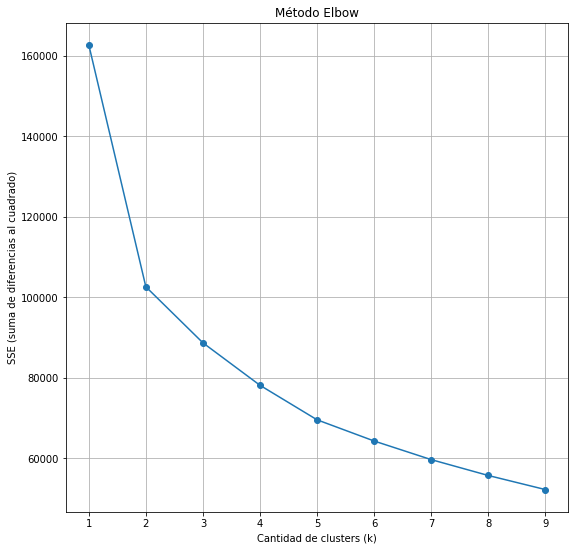

In [27]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.

# Creo la lista de errores
# sse = Sum of Squared Error
sse = []

# Creo la lista de modelos con 10 clusters (0 a 9 clusters)
lista_modelos = list(range(1, 10))

# Por cada n° clusters de K-means
for n_clusters in lista_modelos:
    # Instancio KMeans con n° clusters
    n_clusters = KMeans(n_clusters=n_clusters)
    # La entreno
    n_clusters.fit(abandono_pca2)
    # Calculo y almaceno su error
    sse.append(n_clusters.inertia_)

# Grafico el SSE por cada modelo
plt.figure(figsize=(9, 9))
plt.title('Método Elbow')
plt.xlabel(r'Cantidad de clusters (k)')
plt.ylabel('SSE (suma de diferencias al cuadrado)');
plt.plot(lista_modelos, sse, '-o')
plt.grid()
plt.savefig('pca_2_elbow.png', bbox_inches='tight', transparent=True)
plt.show()


In [28]:
from sklearn.metrics import silhouette_score

# Defino cantidad de clusters con los cuales probar
list_k = list(range(2, 11))

# Almaceno n° cluster y el score de agrupamiento
for n_clusters in list_k:
    # Instancio KMeans por cada n° cluster
    clusterer = KMeans(n_clusters=n_clusters)
    # Ejecuto Kmeans por cada n° cluster
    preds = clusterer.fit_predict(abandono_pca2)
    # Almaceno el valor de los centroides
    centers = clusterer.cluster_centers_
    # Comparo el valor de los centroides con el resto de los puntos
    score = silhouette_score (abandono_pca2, preds)
    # Informo el resultado de cada n° cluster
    print (f'Con {n_clusters} clusters el coeficiente silueta es: {score}.')

Con 2 clusters el coeficiente silueta es: 0.3386512140074234.
Con 3 clusters el coeficiente silueta es: 0.23817209206980974.
Con 4 clusters el coeficiente silueta es: 0.2440724259827037.
Con 5 clusters el coeficiente silueta es: 0.213476055207649.
Con 6 clusters el coeficiente silueta es: 0.1977395533491375.
Con 7 clusters el coeficiente silueta es: 0.20211103837086009.
Con 8 clusters el coeficiente silueta es: 0.19842425790886384.
Con 9 clusters el coeficiente silueta es: 0.20575752630560057.
Con 10 clusters el coeficiente silueta es: 0.20947190356790438.


AttributeError: ignored

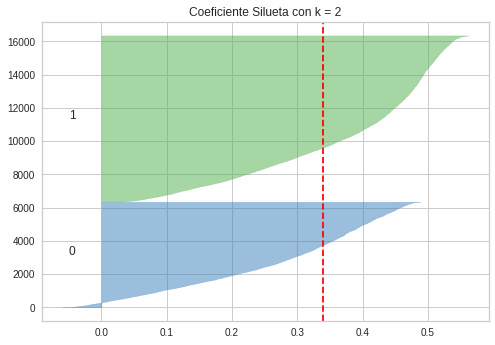

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instancio el modelo con k=2
model = KMeans(2, random_state=0)
# Instancio el visualizador
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    
# Lo entreno con el dataset
visualizer.fit(abandono_pca2)  
visualizer.set_title('Coeficiente Silueta con k = 2')

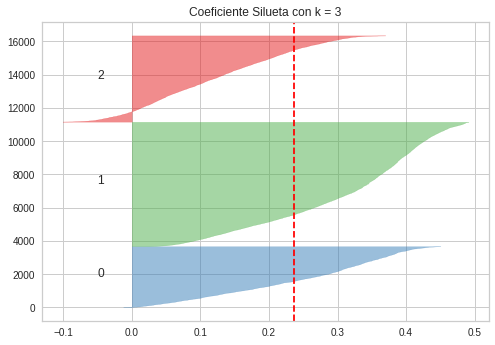

In [ ]:
# Instancio el modelo con k = 3
model = KMeans(3, random_state=0)
# Instancio el visualizador
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    
# Lo entreno con el dataset
visualizer.fit(abandono_pca2)  
visualizer.set_title('Coeficiente Silueta con k = 3')

***Observaciones:***

- El método de Elbow indica que los mejores valores para asignar a K son 2 y 4.
- El coeficiente silueta indica que el mejor valor para K es 2 (a pesar de tener algunos errores) con un score del 33%.
- El coeficiente silueta para K = 3 (valor elegido por mi interpretación) determina que hay algunos errores de agrupación para los puntos pertenecientes al cluster 3 (rojo), pues su score es de 23% (un detrimento importante comparado con K = 2).

## Conclusión:

- El coeficiente silueta nos indica que las conclusiones apuntadas anteriormente pueden no ser del todo ciertas debido a que la cantidad inicial de clusters no es la óptima. 

- En el caso de que sí lo fuera, con K = 2, aun así estaríamos ante un score bajo, síntoma de que persistirían los errores de clasificación.

Por último, se procede con la aplicación de un algoritmo jerárquico sobre el mismo dataset, utilizando el mismo análsisis de PCA:

In [32]:
# Importo para agrupar por jerarquia
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Determino linkage simple para el clustering jerarquico aglomerativo
# Linkage = min_dist o max_similitud
H = linkage(abandono_pca2, 'single')

# Muestro la matriz de distancias entre cada CP
print(f'Matriz de distancias entre cada CP del PCA:\n{squareform(pdist(abandono_pca2))}')


Matriz de distancias entre cada CP del PCA:
[[0.         6.3931055  8.37543233 ... 7.92106247 8.02272993 7.80669658]
 [6.3931055  0.         3.05897214 ... 2.94387245 4.56053998 2.74964432]
 [8.37543233 3.05897214 0.         ... 3.25941204 5.33784843 3.49021562]
 ...
 [7.92106247 2.94387245 3.25941204 ... 0.         2.38170829 0.49642227]
 [8.02272993 4.56053998 5.33784843 ... 2.38170829 0.         2.4102148 ]
 [7.80669658 2.74964432 3.49021562 ... 0.49642227 2.4102148  0.        ]]


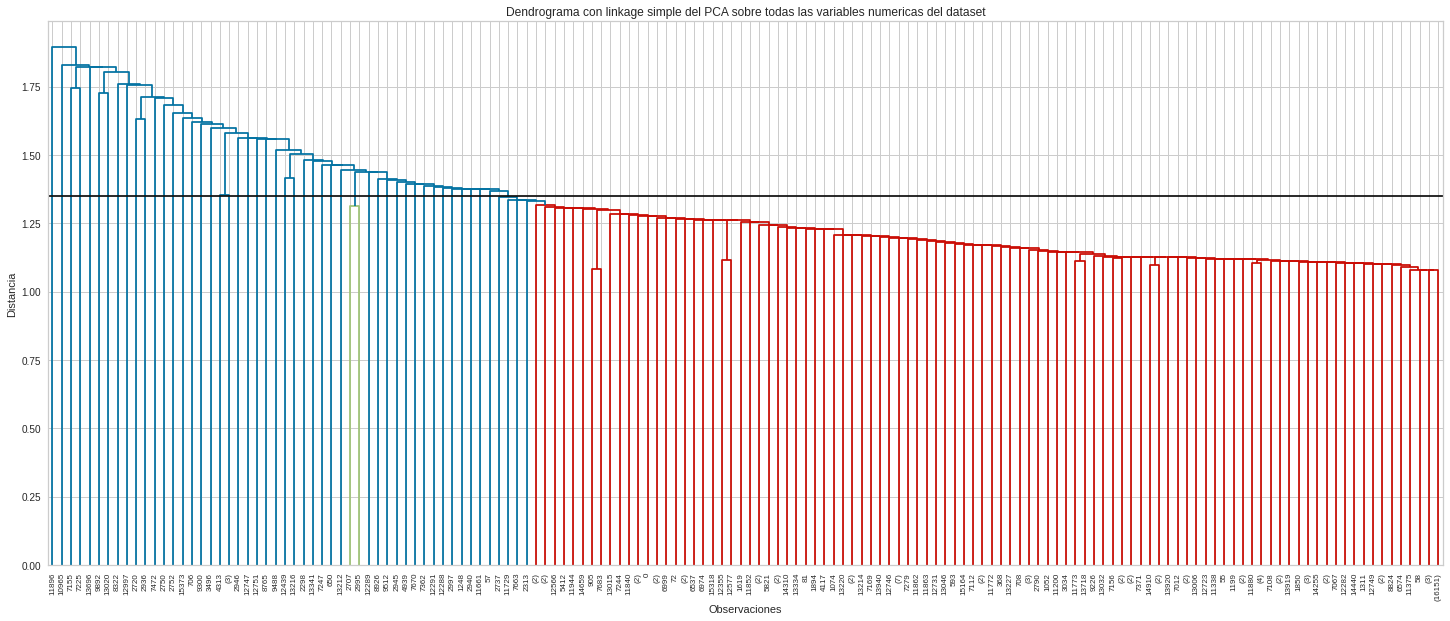

In [33]:
# Grafico el dendrograma del clustering jerarquico aglomerativo

# Defino la cantidad de clusters usando 
# la distancia maxima entre cada observacion
max_d = 1.35

plt.figure(figsize=(25, 10))
plt.title('Dendrograma con linkage simple del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.savefig('pca_2_jerarquico.png', bbox_inches='tight', transparent=True)
plt.show()


***Observaciones:***

- Debido a que este agrupamiento es realizado por linkage simple no permite encontrar una mejor forma de agrupar los datos, pues se obtienen también tres clusters utilizando el valor 1.35 como distancia máxima entre cada observación.

___

### Ejercicio 6:
**Algoritmos jerárquicos**. Incorpore en Colab nuevamente el dataset del punto 5 y realice las siguientes actividades:

- Realice el agrupamiento de los datos utilizando diferentes parámetros.

- Grafique el resultado y escoja cual es el nivel que mejor agrupa los datos.

In [34]:
# Ahora escalo
abandono_scaled = scale(abandono[features])

# Lo muestro
print(f'\nPrimeras 10 tuplas de las features escaladas:\n{abandono_scaled[1:10]}')

# Instancio indicando que deseo capturar al menos 80% de la varianza 
pca = PCA(.80)

# Entreno y transformo
abandono_pca = pca.fit_transform(abandono_scaled)


Primeras 10 tuplas de las features escaladas:
[[-1.25023409 -0.75244423 -0.31063595  0.12109221  0.27705756 -0.67087661
  -0.90083919 -0.16216549  0.68227621 -0.91289099 -0.58227877 -0.54624585]
 [-1.25023409 -0.75244423  3.88017378  1.06519505  1.42100555 -0.67087661
  -0.90083919 -0.77291282  0.11267235 -1.2067591  -1.19242385 -0.88979749]
 [-1.25023409 -0.75244423  0.57832369  1.06519505  1.42100555 -0.67087661
  -0.90083919 -0.77291282  0.11267235 -1.2067591  -1.19242385 -0.88979749]
 [ 1.20720558  0.55275087  0.57832369  0.12109221  0.27705756 -0.67087661
  -0.90083919 -0.16216549 -1.02653538 -0.91289099 -1.49749639 -0.54624585]
 [-1.25023409 -0.42614546  0.32433522  2.0092979   1.42100555  0.34216754
  -0.90083919 -0.77291282 -1.02653538 -0.61902289 -1.19242385 -0.20269421]
 [-1.25023409 -0.75244423  2.48323721  2.0092979   1.42100555 -0.67087661
  -0.90083919 -0.77291282  1.82148394 -1.2067591  -0.27720623 -0.88979749]
 [-1.25023409 -0.75244423  0.83231216  2.0092979   1.421005

In [35]:
# Muestro la matriz de distancias entre cada CP
print(f'Matriz de distancias entre cada CP del PCA:\n{squareform(pdist(abandono_pca))}')

Matriz de distancias entre cada CP del PCA:
[[0.         6.3931055  8.37543233 ... 7.92106247 8.02272993 7.80669658]
 [6.3931055  0.         3.05897214 ... 2.94387245 4.56053998 2.74964432]
 [8.37543233 3.05897214 0.         ... 3.25941204 5.33784843 3.49021562]
 ...
 [7.92106247 2.94387245 3.25941204 ... 0.         2.38170829 0.49642227]
 [8.02272993 4.56053998 5.33784843 ... 2.38170829 0.         2.4102148 ]
 [7.80669658 2.74964432 3.49021562 ... 0.49642227 2.4102148  0.        ]]


In [39]:
# Determino linkage average para el clustering jerarquico aglomerativo
# average = dist_prom entre cada observacion
H = linkage(abandono_pca, 'average')

# Grafico el dendrograma del clustering jerarquico aglomerativo

# Defino la altura de corte
max_d = 5

plt.figure(figsize=(25, 10))
plt.title('Dendrograma linkage average del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.savefig('linkage_average.png', bbox_inches='tight', transparent=True)
plt.show()

KeyboardInterrupt: ignored

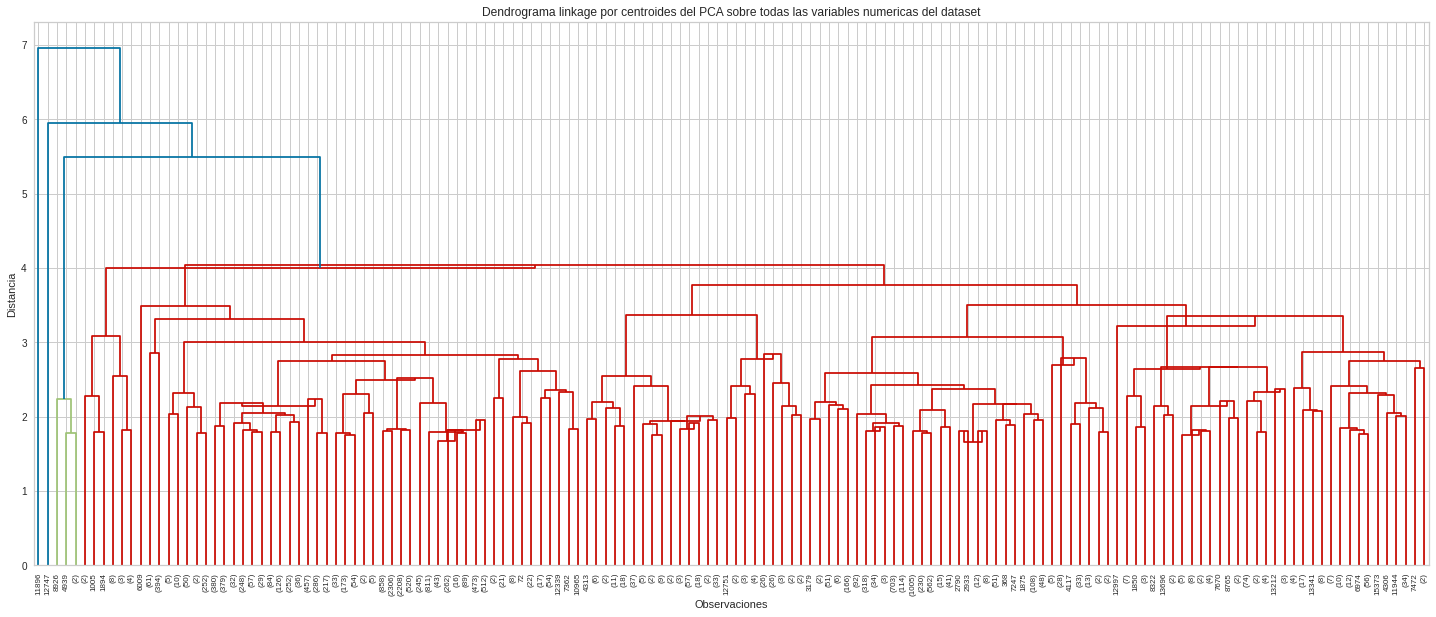

In [40]:
# Determino linkage por centroide para el clustering jerarquico aglomerativo
# average = dist_prom entre cada observacion
H = linkage(abandono_pca, 'centroid')

# Grafico el dendrograma del clustering jerarquico aglomerativo

plt.figure(figsize=(25, 10))
plt.title('Dendrograma linkage por centroides del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.savefig('linkage_centroides.png', bbox_inches='tight', transparent=True)
plt.show()

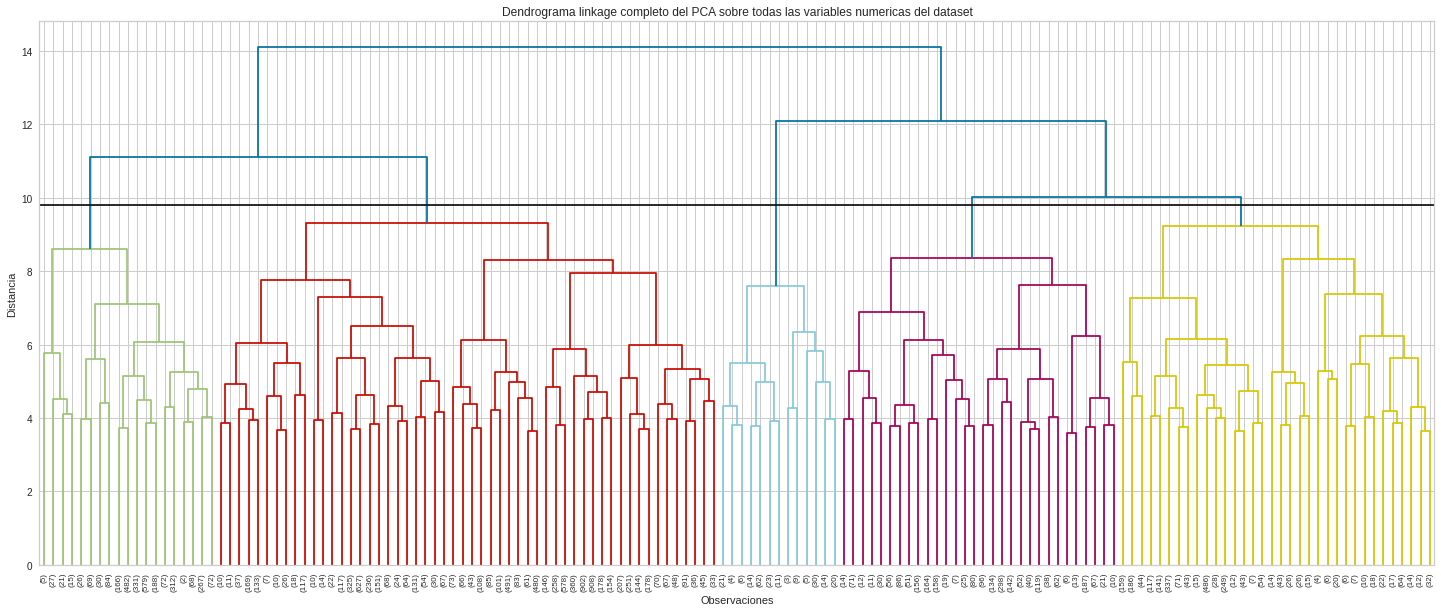

In [38]:
# Determino linkage completo para el clustering jerarquico aglomerativo
# complete = max_dist o min_sim
H = linkage(abandono_pca, 'complete')

# Grafico el dendrograma del clustering jerarquico aglomerativo

# Defino la altura de corte
max_d = 9.8

plt.figure(figsize=(25, 10))
plt.title('Dendrograma linkage completo del PCA sobre todas las variables numericas del dataset')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.savefig('linkage_complete.png', bbox_inches='tight', transparent=True)
plt.show()

## Conclusiones:

- Se detecta sin dudas que el mejor método para agrupar este dataset utilizando un algoritmo jerárquico y aglomerativo es utilizando linkage completo.

- Respecto al valor de corte se pueden utilizar varios criterios. Sin embargo, los colores del gráfico dicen mucho por nosotros y es preferible utilizar una altura que *evite que se fusionen clusters de diferente color* (lo que se traduciría en una mezcla de grupos con diferentes características).

- Es por esto que se decidió que la altura de corte sea 9.8 sobre el eje Y, un valor que evita la fusión de clusters.

# Referencias:
- Imputación por la [media][0].
- [PCA][1] con python.
- PCA con [K-Means][2].
- Recuperación de [CPs][3] luego de hacer PCA.

[0]:https://scikit-learn.org/stable/modules/impute.html
[1]:https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
[2]:https://365datascience.com/pca-k-means/
[3]:https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn